1 - Read and Clean the Data

In [1]:
#Import necessary libraries
import pandas as pd

#Read data
data = pd.read_feather(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Sales Data/Sales_data.ftr")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [2]:
#Check for missing values
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [3]:
#Drop missing values
data = data.dropna(how="all")
#Check it now
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [4]:
#Check for duplicates
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [5]:
#Drop duplicates
data = data.drop_duplicates()
#Check it now
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


2 - Analyze Monthly Sales

In [6]:
#Data don't have monthly sales so we need to extract month from order date
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [8]:
#Define a function
def return_month(x):
    return x.split("/")[0]

In [10]:
#Apply function to data
data["Month"] = data["Order Date"].apply(return_month)
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [11]:
#Check for unique month values
data["Month"].unique()
#There is a value named "Order Date"

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [12]:
filter = data["Month"] == "Order Date"
data[filter] #Only one entry 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [14]:
#Leave out this entry
data = data[~filter]
data[filter]

C:\Users\omerf\AppData\Local\Temp\ipykernel_10820\2821941627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[~filter]
C:\Users\omerf\AppData\Local\Temp\ipykernel_10820\2821941627.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[filter]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [15]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
data["Month"] = data["Month"].astype(int)
data["Quantity Ordered"] = data["Quantity Ordered"].astype(int)
data["Price Each"] = data["Price Each"].astype(float)

In [23]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [25]:
#Create a column named "Sales"
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
data["Sales"].head()

0     23.90
2     99.99
3    600.00
4     11.99
5     11.99
Name: Sales, dtype: float64

In [26]:
data.groupby(["Month"])["Sales"].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

<Axes: xlabel='Month'>

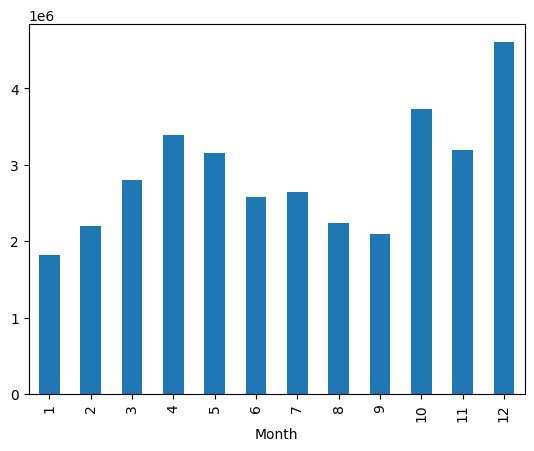

In [27]:
#Plot the sales
data.groupby(["Month"])["Sales"].sum().plot(kind="bar")

As it can be seen from the graph, Christmas may be one of the reasons for the highest sales in December. January is the lowest sales in 12 months.